

## Predpovedanie cien Airbnb v New Yorku
# 1. Úvoda

<b>Airbnb je online trhovisko pre zabezpečovanie alebo ponúkanie ubytovania, hlavne pobytov u domácich hostiteľov od roku 2008. NYC je najľudnatejším mestom v Spojených štátoch a zároveň jedným z najpopulárnejších miest pre turizmus a obchod na svete. </b> 

<b>Dáta Airbnb z roku 2019 pre NYC obsahujú informácie o zozname aktivít a metrikách. Dataset obsahuje záznamy na základe ktorých budeme v tomto projekte budeme vytvárať najlepší predikčný model ceny. V prvej časti sa budeme zoznamovať so štruktúrou datasetu. V druhej časti graficky analyzujeme dáta a skúmame vzťahy medzi atribútmi. Tretia časť obsahuje už samotné modelovanie predikcie ceny pomocou niekoľkých modelov. V prvej fáze získame prehľad o tom, ktoré modely su najvhodnejšie pre náš projekt a v druhej fáze budeme vylepšovať náš dataset tak, aby boli naše modely čo najpresnejšie. </b>

Načítanie knižníc v Pythone, ktoré sú používané na analýzu dát.V Pythoni sa knižnice ako pandas a numpy často využívajú pre manipuláciu s dátami a vedecké výpočty, zatiaľ čo matplotlib a seaborn slúžia na vizualizáciu dát a 
tvorbu grafov. Knižnica scipy je špecializovaná na štatistické metódy a výpočty pre vedecké a technické aplikácie. Knižnica scikit-learn (sklearn) je zase široko využívaná pre strojové učenie obsahuje modely, nástroje na predspracovanie dát a metriky na vyhodnocovanie modelov.

In [1]:
#importovanie potrebných knižníc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

# Dataset
nyc_data - obsahuje ID ubytovania a dalšie podrobnostia o každejrezerváciie nazov, typ izby, cena,....)
Premenne v danom súbore:
 * id (int) - dentifikačné číslo 
 * name(str) - nazov ubytovania
 * host_id(int) - ID hostiteľa
 * host_name(str) - názov hostiteľa
 * neighbourhood_group(str) - názov mestského obvodu
 * neighbourhood(str) - názov časti mesta v obvode
 * latitude(float) - zemepisná šírka
 * longitude(float) - zemepisná dĺžka
 * room_type(str) - typ izby
 * price(int) - cena ubytovania
 * minimum_nights(int) - minimálny počet dní na vytvorenie rezervácie ubytovania
 * number_of_reviews(int) - počet recenzií ubytovania
 * last_review(date) - posledná recenzia
 * reviews_per_month(float) - počet recenzií za mesiac
 * calculated_host_listings_count(int) - počet ubytovaní ktoré majiteľ vlastní
 * availability_365(int) - dostupnosť ubytovania počas roka

In [2]:
#načítanie súboru AB_NYC_2019.csv, ktorý sa vloží do premennej nyc_data ako dátový rámec pomocou knižnice pandas.
nyc_data = pd.read_csv('/Users/radkakubikova/Downloads/AB_NYC_2019.csv')

In [3]:
#prehľad prvých 10 riadkov dát, ktorý poskytuje informácie o ich štruktúre a obsahu.
nyc_data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
#základné informácie o dátovej štruktúry nyc_data
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#identifikujeme chýbajúce hodnoty (NaN) pre dátový rámec nyc_data
nyc_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<b>Tabuľka vyššie zobrazuj, počet chýbajúcich hodnôt pre každý stĺpec v dátovom rámci nyc_data. Na základe tejto tabuľky môžeme vidieť, ktoré stĺpce majú chýbajúce hodnoty a koľko ich má každý stĺpec. Ako vidíme ``last_review`` a ``reviews_per_month`` majú 10 052 chýbajúcich hodnôt. To znamená, že v týchto stĺpcoch chýbajú údaje pre 10 052 záznamov v našom datasete.</b>

# 2. Data Exploratory Analysis

<b>Prvý graf je o vzťahu medzi ``price`` a ``room type`` na základe dát z dátového rámca nyc_d_data. Cena za ``Shared room`` je vždy nižšia ako 2000 dolárov. Naopak, ``private room`` a ``entire home`` majú v niektorých prípadoch najvyššiu cenu.</b>

Text(0.5, 1.0, 'Room Type vs Price')

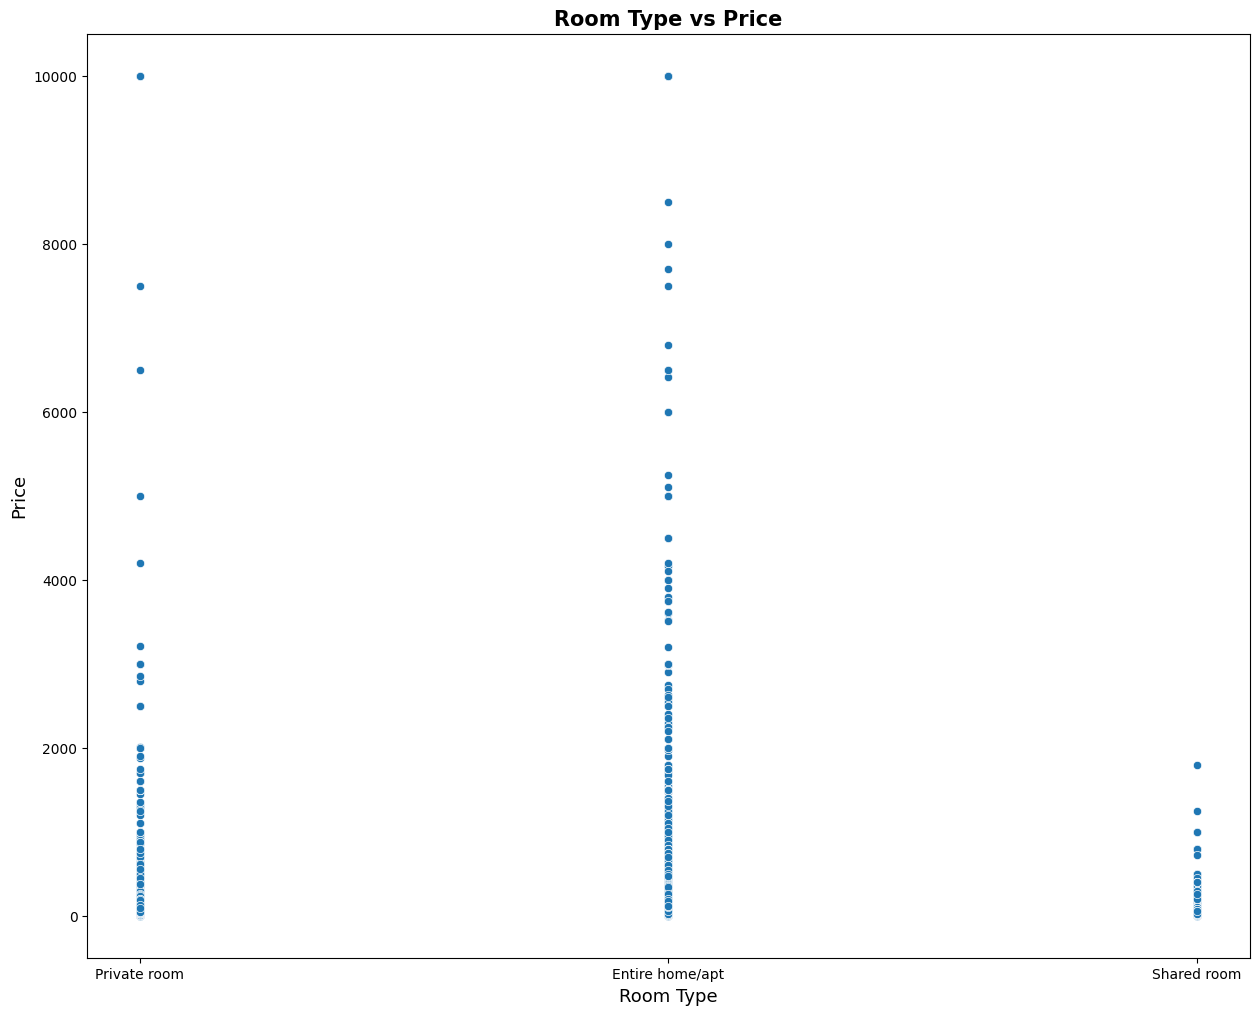

In [6]:
#vytvorenie obrázku na zobrazenie vzťahu medzi cenou a typom izby
plt.figure(figsize=(15,12))
#bodový graf, kde je na x osi 'room_type' a na y osi 'price' z dáztového rámca nyc_data
sns.scatterplot(x='room_type', y='price', data=nyc_data)
#určenie popisu x a y osi, veľkosť písma
plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
#určenie nadpisu grafu, veľkosť písma a hrúbkou písma
plt.title("Room Type vs Price",size=15, weight='bold')

<b>Graf nižšie zobrazuje podrobnosti o ``price`` a ``room type`` v závislosti od ``neighborhood group``. Bodové veľkosti a farby sú prispôsobené podľa skupín štvrtí. Najvyššia cena ``Private Room`` a ``Entire Home/Apt`` je v rovnakej oblasti, a to v ``Manhattan``. Brooklyn tiež má veľmi vysoké ceny pre ``Private Room`` a ``Entire Home/Apt``. Naopak, najvyššia cena za ``shared room`` je v oblasti Queens. area.</b>

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

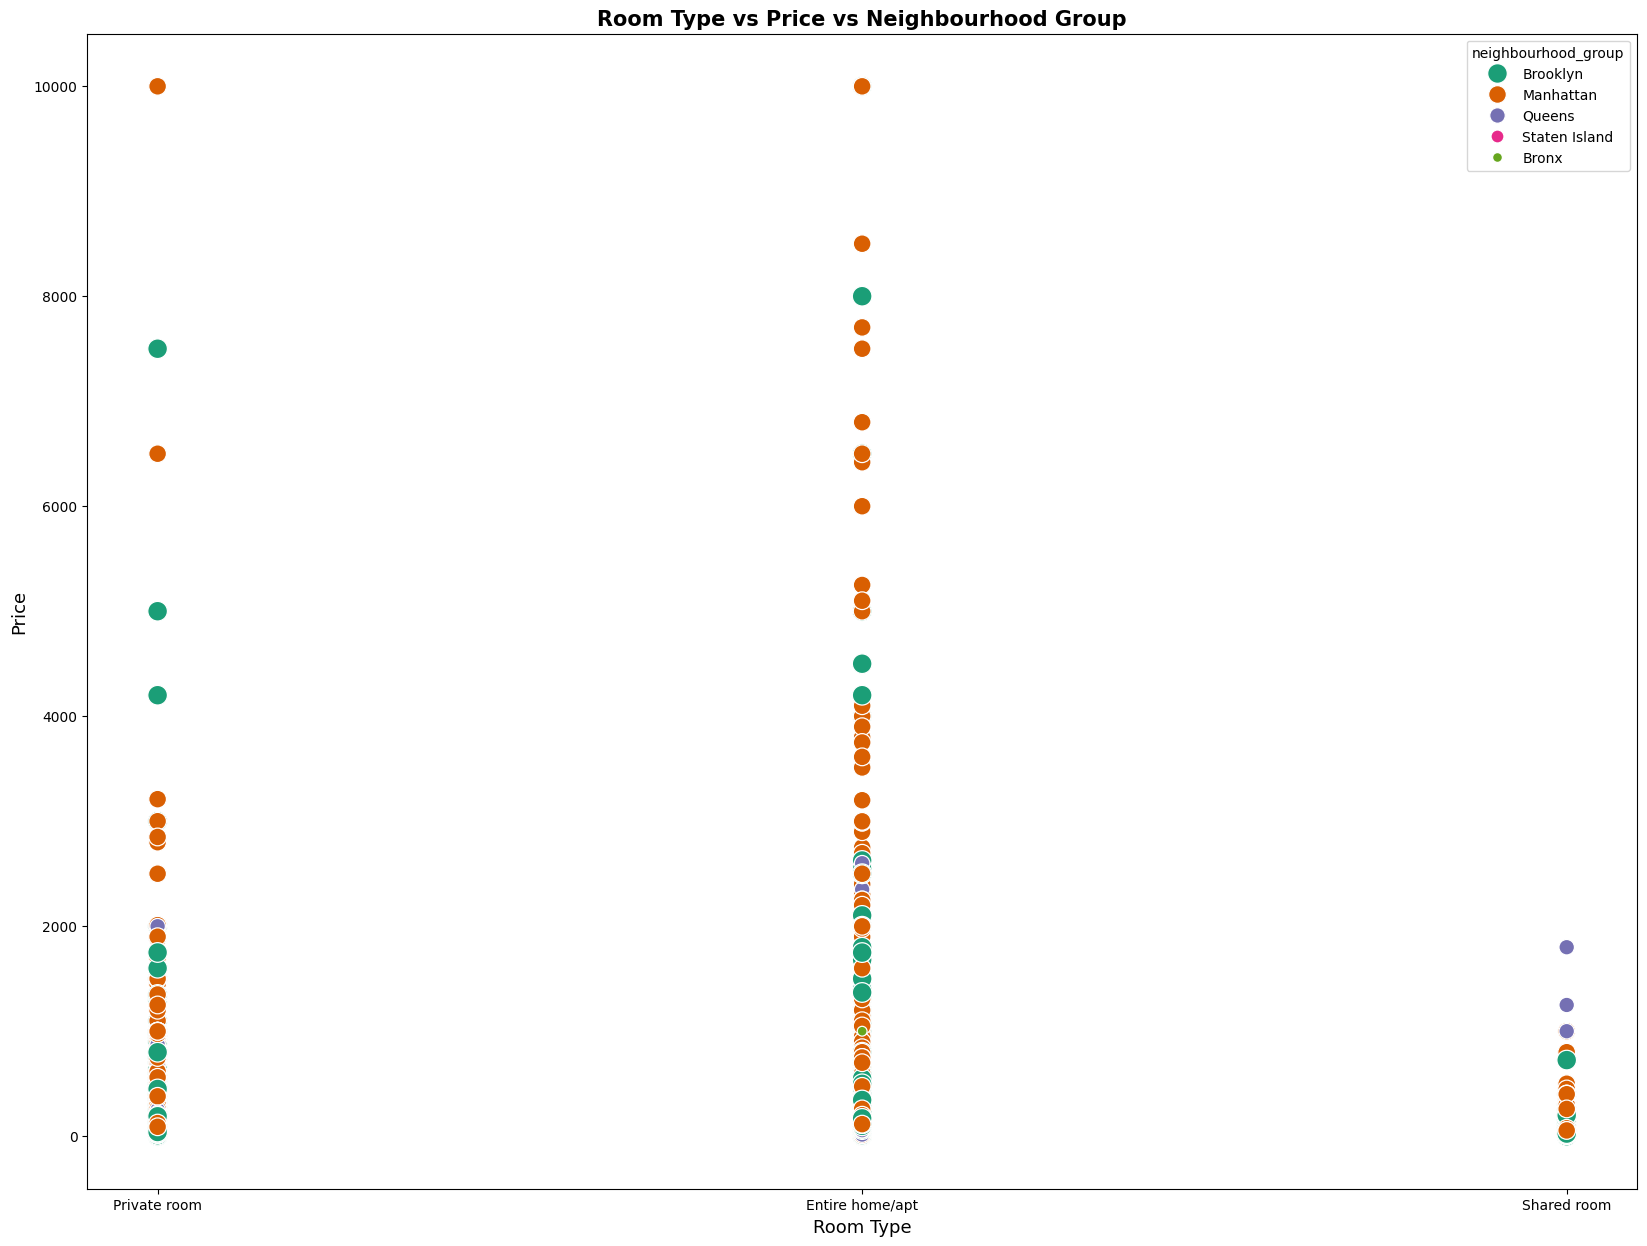

In [7]:
#vytvorenie bodového grafu na zobrazenie detailov o cene a type izby v závislosti od neighbourhood group
plt.figure(figsize=(20,15))
#stĺpce použité na x a y osi 
#definovanie farebnej palety použitej na zobrazenie bodov a veľkosti bodov na základeneighbourhood group
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=nyc_data)
#určenie popisu x a y osi, veľkosť písma
plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
#určenie nadpisu grafu, veľkosť písma a hrúbkou písma
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

<b>Ďalší graf sa týka vzťahu ``price`` a ``number of reviews`` v závislosti od ``neighborhood group``. Zobrazuje, že nižšie ceny majú väčší počet recenzií ako tie vyššie ceny. Ukazuje sa negatívna korelácia medzi ``price`` a ``number of reviews``. Taktiež štvrte ``Manhattan``, ``Brooklyn`` a ``Queens`` majú vyšší počet recenzií ako ostatné.</b>

Text(0.5, 1.0, 'Price vs Number of Reviews vs Neighbourhood Group')

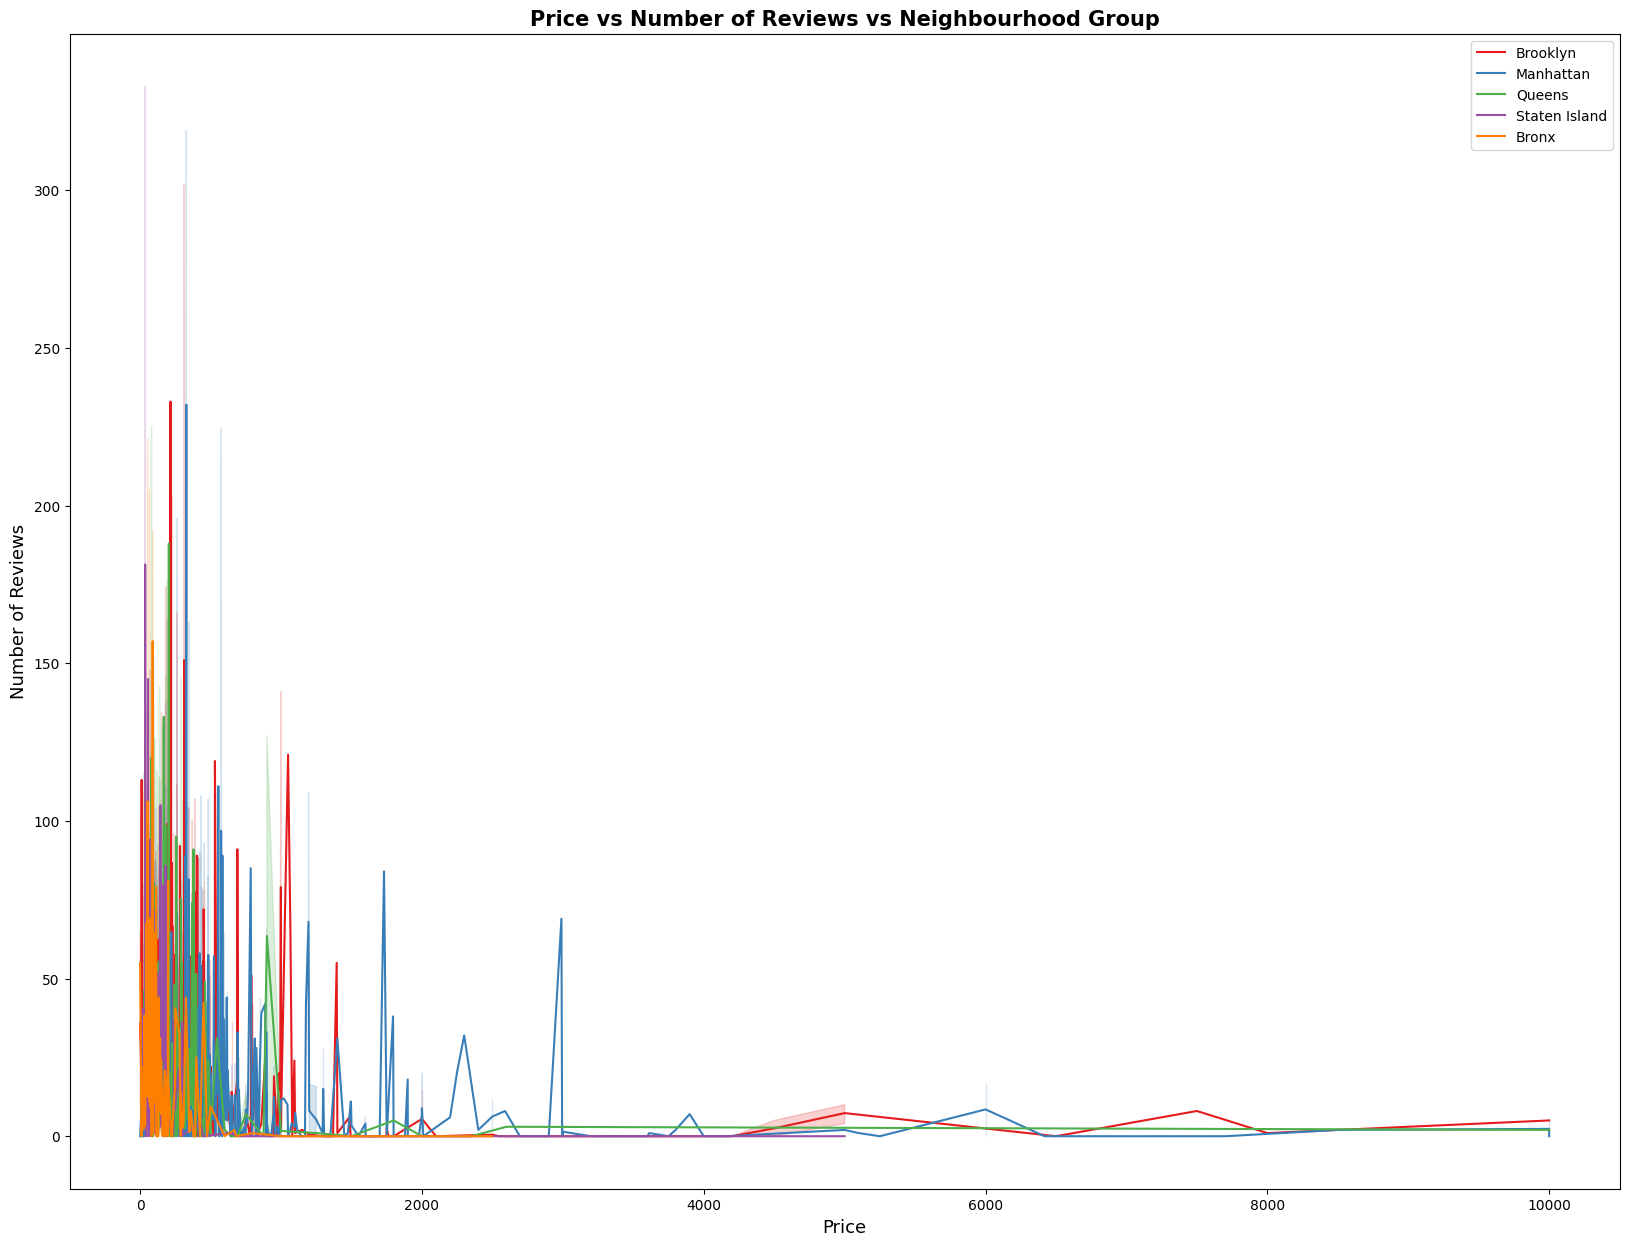

In [8]:
#vytvorenie čiarového grafu a porovnáva cenu ubytovania a počet recenzií pre rôzne štvrte v New Yorku
#Každá štvrť je reprezentovaná farebne a čiarou
plt.figure(figsize=(20,15))
sns.set_palette("Set1")

sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Brooklyn'],
             label='Brooklyn')
sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Manhattan'],
             label='Manhattan')
sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Queens'],
             label='Queens')
sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Staten Island'],
             label='Staten Island')
sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Bronx'],
             label='Bronx')
#určenie popisu x a y osi, veľkosť písmma
plt.xlabel("Price", size=13)
plt.ylabel("Number of Reviews", size=13)
#určenie nadpisu grafu, veľkosť písma a hrúbkou písma
plt.title("Price vs Number of Reviews vs Neighbourhood Group",size=15, weight='bold')

Violin graf ukazuje, ako sa ceny ubytovania líšia medzi rôznymi štvrťami v New Yorku. Šírka časti grafu ukazuje, kde sa ceny častejšie vyskytujú, a tvar ukazuje, ako sú ceny rozložené - či sú blízko priemeru alebo rozptýlené na rôzne hodnoty. Môžme vidieť, že v Queens sú ceny ubytovania častejšie vo vyšších hodnotách v porovnaní s ostatnými štvrťami

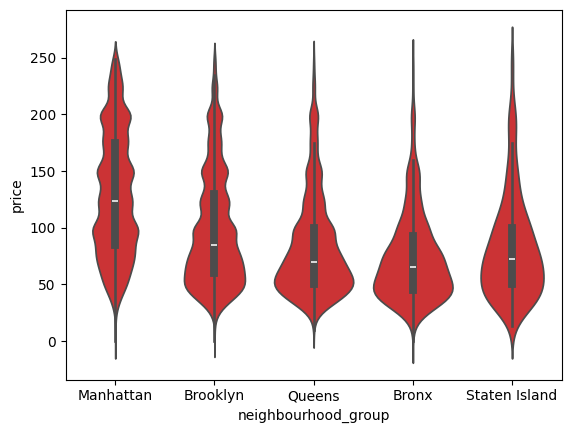

In [9]:

neighbourhood_order = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

sns.violinplot(data=nyc_data[nyc_data.price < 250], x='neighbourhood_group', y='price', order=neighbourhood_order)
plt.show()


<b>Nižšie dolu sme si vytvorili mapu na zobrazenie hustoty záznamov, čo umožňuje identifikovať oblasti s vyššou koncentráciou údajov. Teplotné body na mape sú farebne kódované podľa ich hodnôt, pričom modrá farba reprezentuje nižšie hodnoty a červená vyššie.</b>

In [10]:
#interaktívnu teplotnú mapu vytvárame pomocou knižnice Folium v Pythone a pomocou metódy HeatMap()
import folium
from folium.plugins import HeatMap
#folium.Map() vytvára mapu so zadanou počiatočnou polohou a priblížením
#mapa zobrazuje zemepisnú polohu (latitude, longitude) na základe dátového rámca nyc_data pre New York
m=folium.Map([40.7128,-74.0060],zoom_start=11)
#Teplotné body na mape sú farebne kódované podľa ich hodnôt
HeatMap(nyc_data[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
#Funkcia display(m) zobrazuje vytvorenú mapu
display(m)

In [11]:
nyc_data #dataset pred úpravou kategorických premenných

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Kód transformuje určité stĺpce v dátovom rámci nyc_data na kategorické hodnoty a kóduje ich do číselných kódov pomocou funkcie cat.code z knižnice Pandas. Konkrétne, stĺpce ``neighbourhood_group``, ``neighbourhood`` a ``room_type`` sa zmenia na kategorické dáta a následne sú zakódované do číselných formátov.

Funkcia .info() poskytuje základné informácie o dátovom rámci nyc_data, ako sú počty neprázdnych hodnôt a typy stĺpcov. Tieto transformácie môžu pomôcť pri modelovaní alebo analýze dát, pretože kategorické hodnoty sú prevádzané do číselnej formy, čo môže byť užitočné pre mnohé algoritmy 

In [12]:
nyc_data['neighbourhood_group']= nyc_data['neighbourhood_group'].astype("category").cat.codes
nyc_data['neighbourhood'] = nyc_data['neighbourhood'].astype("category").cat.codes
nyc_data['room_type'] = nyc_data['room_type'].astype("category").cat.codes
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  int8   
 5   neighbourhood                   48895 non-null  int16  
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  int8   
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [13]:
nyc_data #dataset po úprave kategorických premenných

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,1,108,40.64749,-73.97237,1,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,2,127,40.75362,-73.98377,0,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2,94,40.80902,-73.94190,1,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,41,40.68514,-73.95976,0,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,2,61,40.79851,-73.94399,0,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,1,13,40.67853,-73.94995,1,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,1,28,40.70184,-73.93317,1,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,2,94,40.81475,-73.94867,0,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,2,95,40.75751,-73.99112,2,55,1,0,NaN,NaN,6,2


## Price Distribution Plot 

<b>Graf distribúcie cien nám ukazuje, že ceny majú pravý sklon, čo naznačuje pozitívny sklon dát. Na vyrovnávanie tohto sklonu bol použitý logaritmický transformačný postup pre tento atribút. Tento krok má za cieľ zjednodušiť interpretáciu a zlepšiť presnosť štatistickej analýzy.<b>

Text(0.5, 1.0, 'Price Distribution Plot')

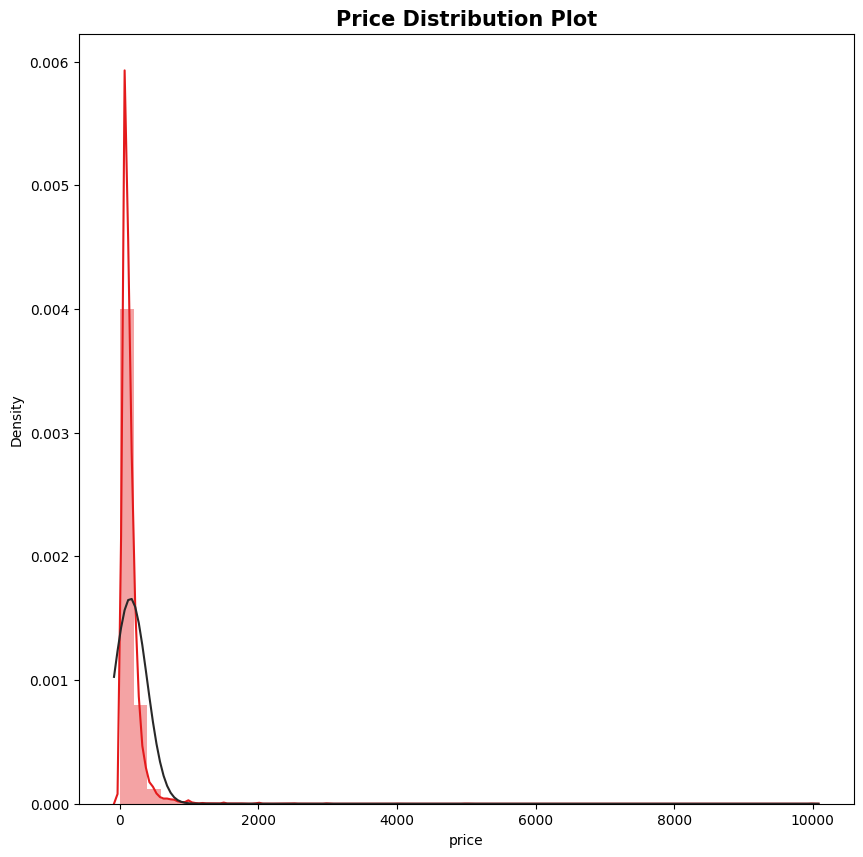

In [14]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning) #warning pre distplot
#určenie veľkosti obrázku výsledného grafu
plt.figure(figsize=(10,10))
#metóda sns.distplot() vytvára distribučný graf pre hodnoty v stĺpci 'price' v dátovom rámci nyc_data
sns.distplot(nyc_data['price'], fit=norm)
#nastavenie nadpisu grafu, veľkosť písma a hrúbkou písma
plt.title("Price Distribution Plot",size=15, weight='bold')

<b>Následne sme si pridavli nový stĺpec s názvom 'price_log' v dátovom rámci nyc_data. Hodnoty v tomto stĺpci sú výsledkom logaritmickej transformácie hodnôt zo stĺpca 'price'. K tomu sa pridáva hodnota 1, čo rieši problém s logaritmovaním nulových hodnôt, s cieľom vylepšiť distribúciu hodnôt ceny pre lepšie modelovanie. Použitie logaritmickej transformácie tak môže pomôcť vyrovnať rozloženie hodnôt ceny, ak pôvodné hodnoty nie sú normálne distribuované alebo majú veľký rozsah hodnôt. </b>

In [15]:
#Vytvorenie nového stĺpca v datasete, ktorý obsahuje logaritmickú transformáciu hodnôt stĺpca 'price' 
#Na výpočet logaritmu sa používa funkcia np.log(), pričom k hodnotám v stĺpci 'price' sa pripočíta hodnota 1
nyc_data['price_log'] = np.log(nyc_data.price+1)

<b>Pomocou transformácie má teraz cena normálne rozdelenie.</b>

## Log-price Distribution Plot

<b>Tento graf naznačuje, že normálna distribúcia je primeraným priblížením naších dát. Prispôsobenie krivky sa dobre zhoduje s tvarom distribúcie, čo poukazuje na to, že dáta sa pomerne blízko podobajú normálnemu rozdeleniu.</b>

Text(0.5, 1.0, 'Log-Price Distribution Plot')

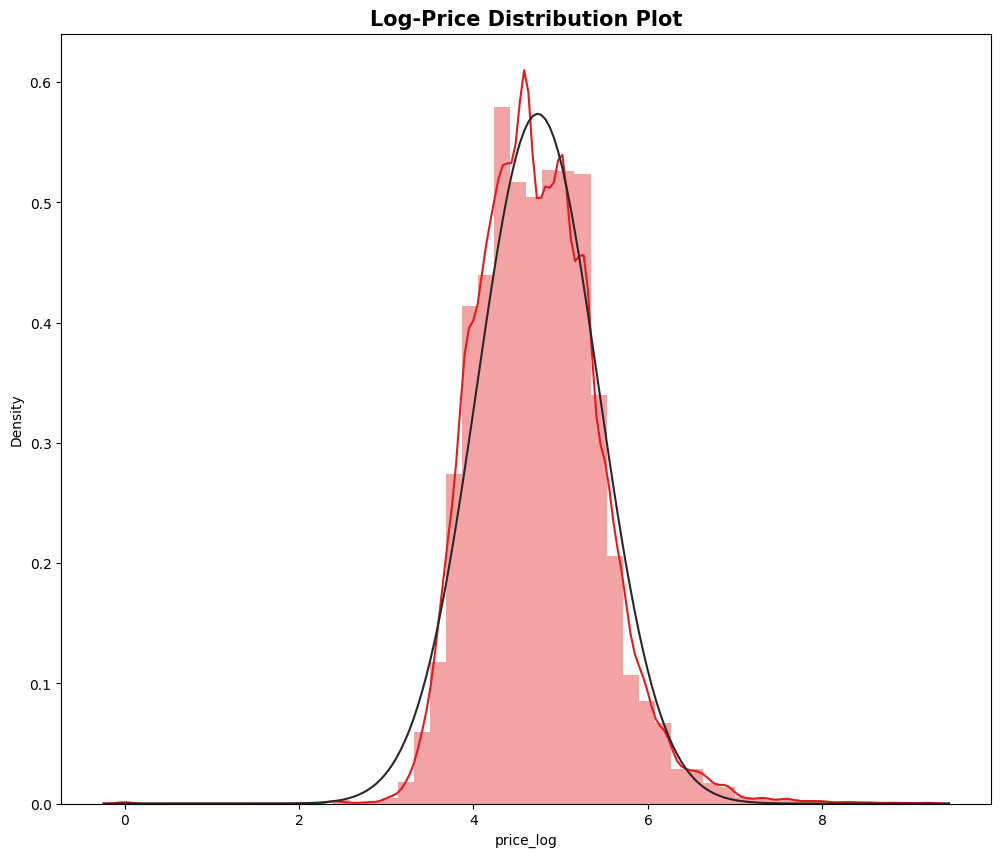

In [16]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning) #warning pre distplot
#určenie veľkosti obrázku výsledného grafu
plt.figure(figsize=(12,10))
#metóda sns.distplot() vytvára distribučný graf pre hodnoty v stĺpci 'price_log' v dátovom rámci nyc_data
sns.distplot(nyc_data['price_log'], fit=norm)
#nastavenie nadpisu grafu, veľkosť písma a hrúbkou písma
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

## Probability Plot 

<b>Tento graf slúži na porovnanie štatistickej distribúcie (v tomto prípade logaritmickej transformácie cien) so štandardnou normálnou distribúciou. Graf pomáha posúdiť, ako dobre sa dáta zhodujú so štandardnou normálnou distribúciou.</b>


Text(0.5, 1.0, 'Price Distribution Plot')

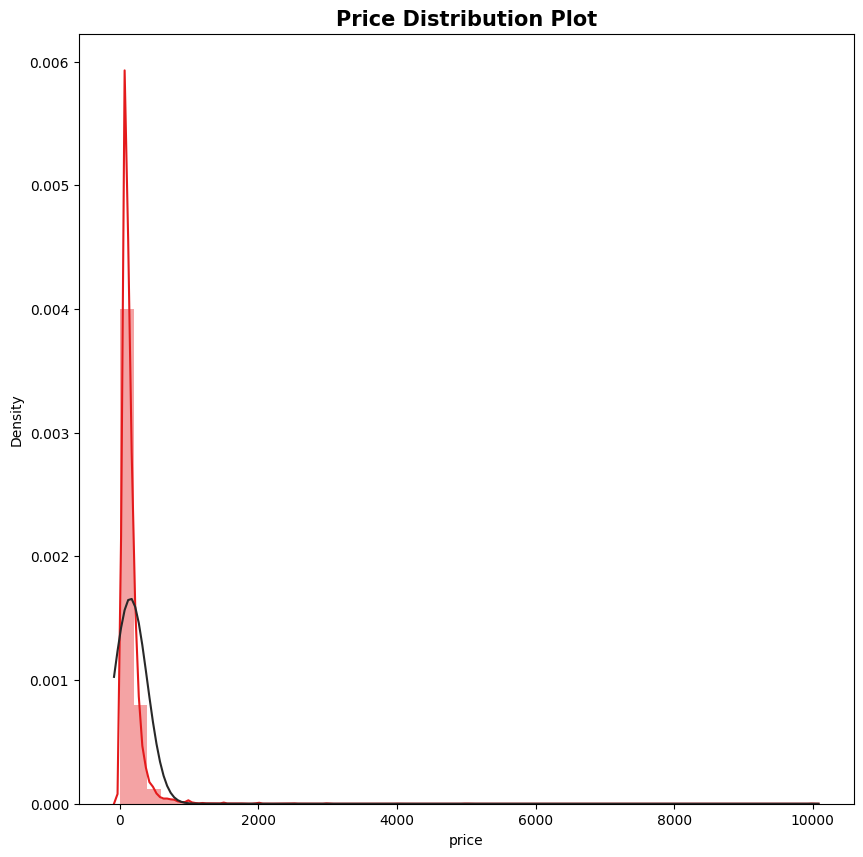

In [17]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning) #warning pre distplot
#určenie veľkosti obrázku výsledného grafu
plt.figure(figsize=(10,10))
#metóda sns.distplot() vytvára distribučný graf pre hodnoty v stĺpci 'price' v dátovom rámci nyc_data
sns.distplot(nyc_data['price'], fit=norm)
#nastavenie nadpisu grafu, veľkosť písma a hrúbkou písma
plt.title("Price Distribution Plot",size=15, weight='bold')



<b>Atribút host_name je pre nás nepodstatný. Meno hostiteľa má veľmi obmedzený, ak nie žiadny vplyv na iné faktory, ako je cena alebo recenzie na zozname. Preto odstránime takéto atribúty, aby sme udržali náš dataset kompaktný.
Teraz je čas pripraviť dáta pre modelovanie. Najprv budú odstránené nenumerické údaje a cena.Predikcia ceny v tomto prípade bude založená na zvyšných informáciách v nyc_model. Účelom odstránenia cieľovej premennej z trénovacieho datasetu je zabezpečiť, že model sa učí predikovať 'price' zo zvyšných dostupných informácií, nie zo samotnej 'price', čo by mohlo viesť k nepresnostiam alebo prenášaniu informácií z cieľovej premennej späť do modelu.</b>


In [18]:
#vytvorenie novej dátovej štruktúry nyc_model z pôvodného dátového rámca nyc_data
#V novom rámci sú odstránené stĺpce name, id, host_id, host_name, last_review a price
nyc_model = nyc_data.drop(columns=['name','id' ,'host_id','host_name', 
                                   'last_review','price'])
#identifikujeme chýbajúce hodnoty (NaN) pre dátový rámec nyc_model
nyc_model.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price_log                             0
dtype: int64

<b>Ako vidíme ``Number of reviews`` obsahuje niekoľko chýbajúcich údajov, ktoré budú nahradené ich priemerom.</b>

In [19]:
#vypočíta priemer hodnôt v stĺpci 'reviews_per_month' v dátovom rámci nyc_model a uloží ho do premennej mean
mean = nyc_model['reviews_per_month'].mean()
#nahradenie chýbajúcih hodnôt v stĺpci 'reviews_per_month' stĺpcom 'mean'
nyc_model['reviews_per_month'].fillna(mean, inplace=True)
#identifikujeme chýbajúce hodnoty (NaN) pre dátový rámec nyc_model
nyc_model.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

## Multikolinearita

<b>Teraz sme vyriešili chýbajúce a NaN hodnoty, odstránili nevýznamné stĺpce, naším konečným cieľom je vytvoriť model na predpovedanie ceny so zostávajúcimi funkciami. V prvom rade sa chceme rozhodnúť, či existuje nejaká funkcia, ktorá silne koreluje s cenou našej značky. Tento cieľ je možné dosiahnuť pomocou funkcie corr() plus tepelnej mapy.
Teraz sa urobí viac podrobností o údajoch. Vytvorí sa korelačná tabuľka a použije sa Pearsonova metóda.</b>



In [24]:
korel=nyc_model.iloc[:,2:].corr(numeric_only=True)
korel

,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
latitude,1.000000,0.084788,0.006481,0.024869,-0.015389,-0.009115,0.019517,-0.010983,0.079339
longitude,0.084788,1.000000,0.184341,-0.062747,0.059094,0.131599,-0.114713,0.082731,-0.325043
room_type,0.006481,0.184341,1.000000,-0.069792,0.002724,0.036013,-0.106055,0.022500,-0.610417
minimum_nights,0.024869,-0.062747,-0.069792,1.000000,-0.080116,-0.091942,0.127960,0.144303,0.033185
number_of_reviews,-0.015389,0.059094,0.002724,-0.080116,1.000000,0.530093,-0.072376,0.172028,-0.042801
reviews_per_month,-0.009115,0.131599,0.036013,-0.091942,0.530093,1.000000,-0.006701,0.162980,-0.033481
calculated_host_listings_count,0.019517,-0.114713,-0.106055,0.127960,-0.072376,-0.006701,1.000000,0.225701,0.132274
availability_365,-0.010983,0.082731,0.022500,0.144303,0.172028,0.162980,0.225701,1.000000,0.098558
price_log,0.079339,-0.325043,-0.610417,0.033185,-0.042801,-0.033481,0.132274,0.098558,1.000000




<b>Graf zobrazuje korelácie medzi jednotlivými atribútmi pomocou farieb a hodnôt. Atribúty, ktoré majú silnú pozitívnu koreláciu, budú mať svetlejšiu farbu, zatiaľ čo atribúty s negatívnou koreláciou budú mať tmavšiu farbu.
Korelačná analýza je užitočná pri určovaní vzťahov medzi premennými a môže poskytnúť informácie o tom, akým spôsobom sú premenné navzájom ovplyvnené.</b>

Text(0.5, 1.0, 'Correlation Matrix')

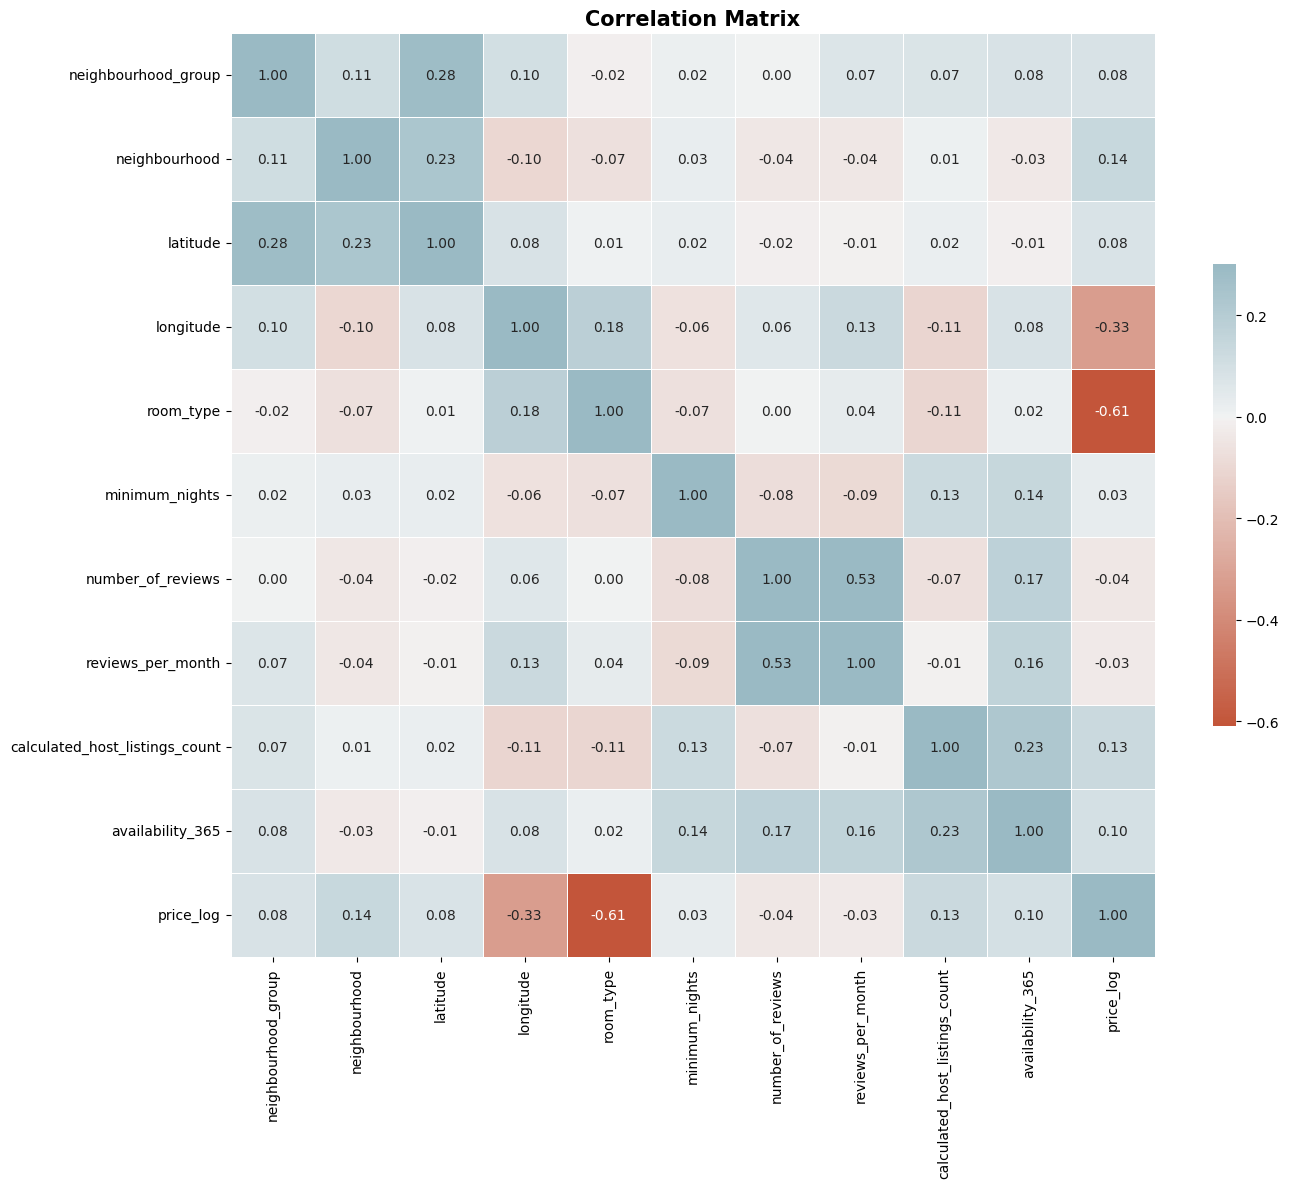

In [25]:
#vytvárenie noveho obrázoku (graf), ktorý má veľkosť 15x12 
plt.figure(figsize=(15,12))
#graf bude vytvorený z palety farieb, ktorá bude obsahovať 256 farieb
palette = sns.diverging_palette(20, 220, n=256)
#vypočíta korelačnú maticu 
corr=nyc_model.corr(method='pearson')
#Tento kód vytvára teplotnú mapu (heatmap) z korelačnej matice corr. 
#bude zobrazovať vzťahy medzi premennými s hodnotami korelácií, farebnou škálou a formátovaním bunkových hodnôt.
#Zabezpečí, že každý štvorec v mape má rovnakú veľkosť a hrúbku čiar oddelujúcich štvorce.
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
#definovanie nadpisu matice so špecifikovanou veľkosťou obrázka a písma
plt.title("Correlation Matrix",size=15, weight='bold')

<b>Korelačná tabuľka ukazuje, že neexistuje silný vzťah medzi cenou a inými vlastnosťami. 

## Residual Plots

Residual Plot je  metóda na zisťovanie odľahlých hodnôt, nelineárnych údajov a zisťovanie údajov pre regresné modely. V grafoch nižšie sú zobrazené reziduálne grafy pre každú vlastnosť v porovnaní s cenou. Ideálny reziduálny graf by mal mať červenú čiaru vodorovne. Na základe týchto grafov sa zdá, že väčšina vlastností nesleduje lineárnu formu. Napriek tomu nevidíme príliš veľa odľahlých hodnôt v žiadnej vlastnosti. 


In [26]:
# rodelenie datasetu nyc_model na vstupné premenné (nyc_model_x) a cieľovú premennú (nyc_model_y).
nyc_model_x, nyc_model_y = nyc_model.iloc[:,:-1], nyc_model.iloc[:,-1]

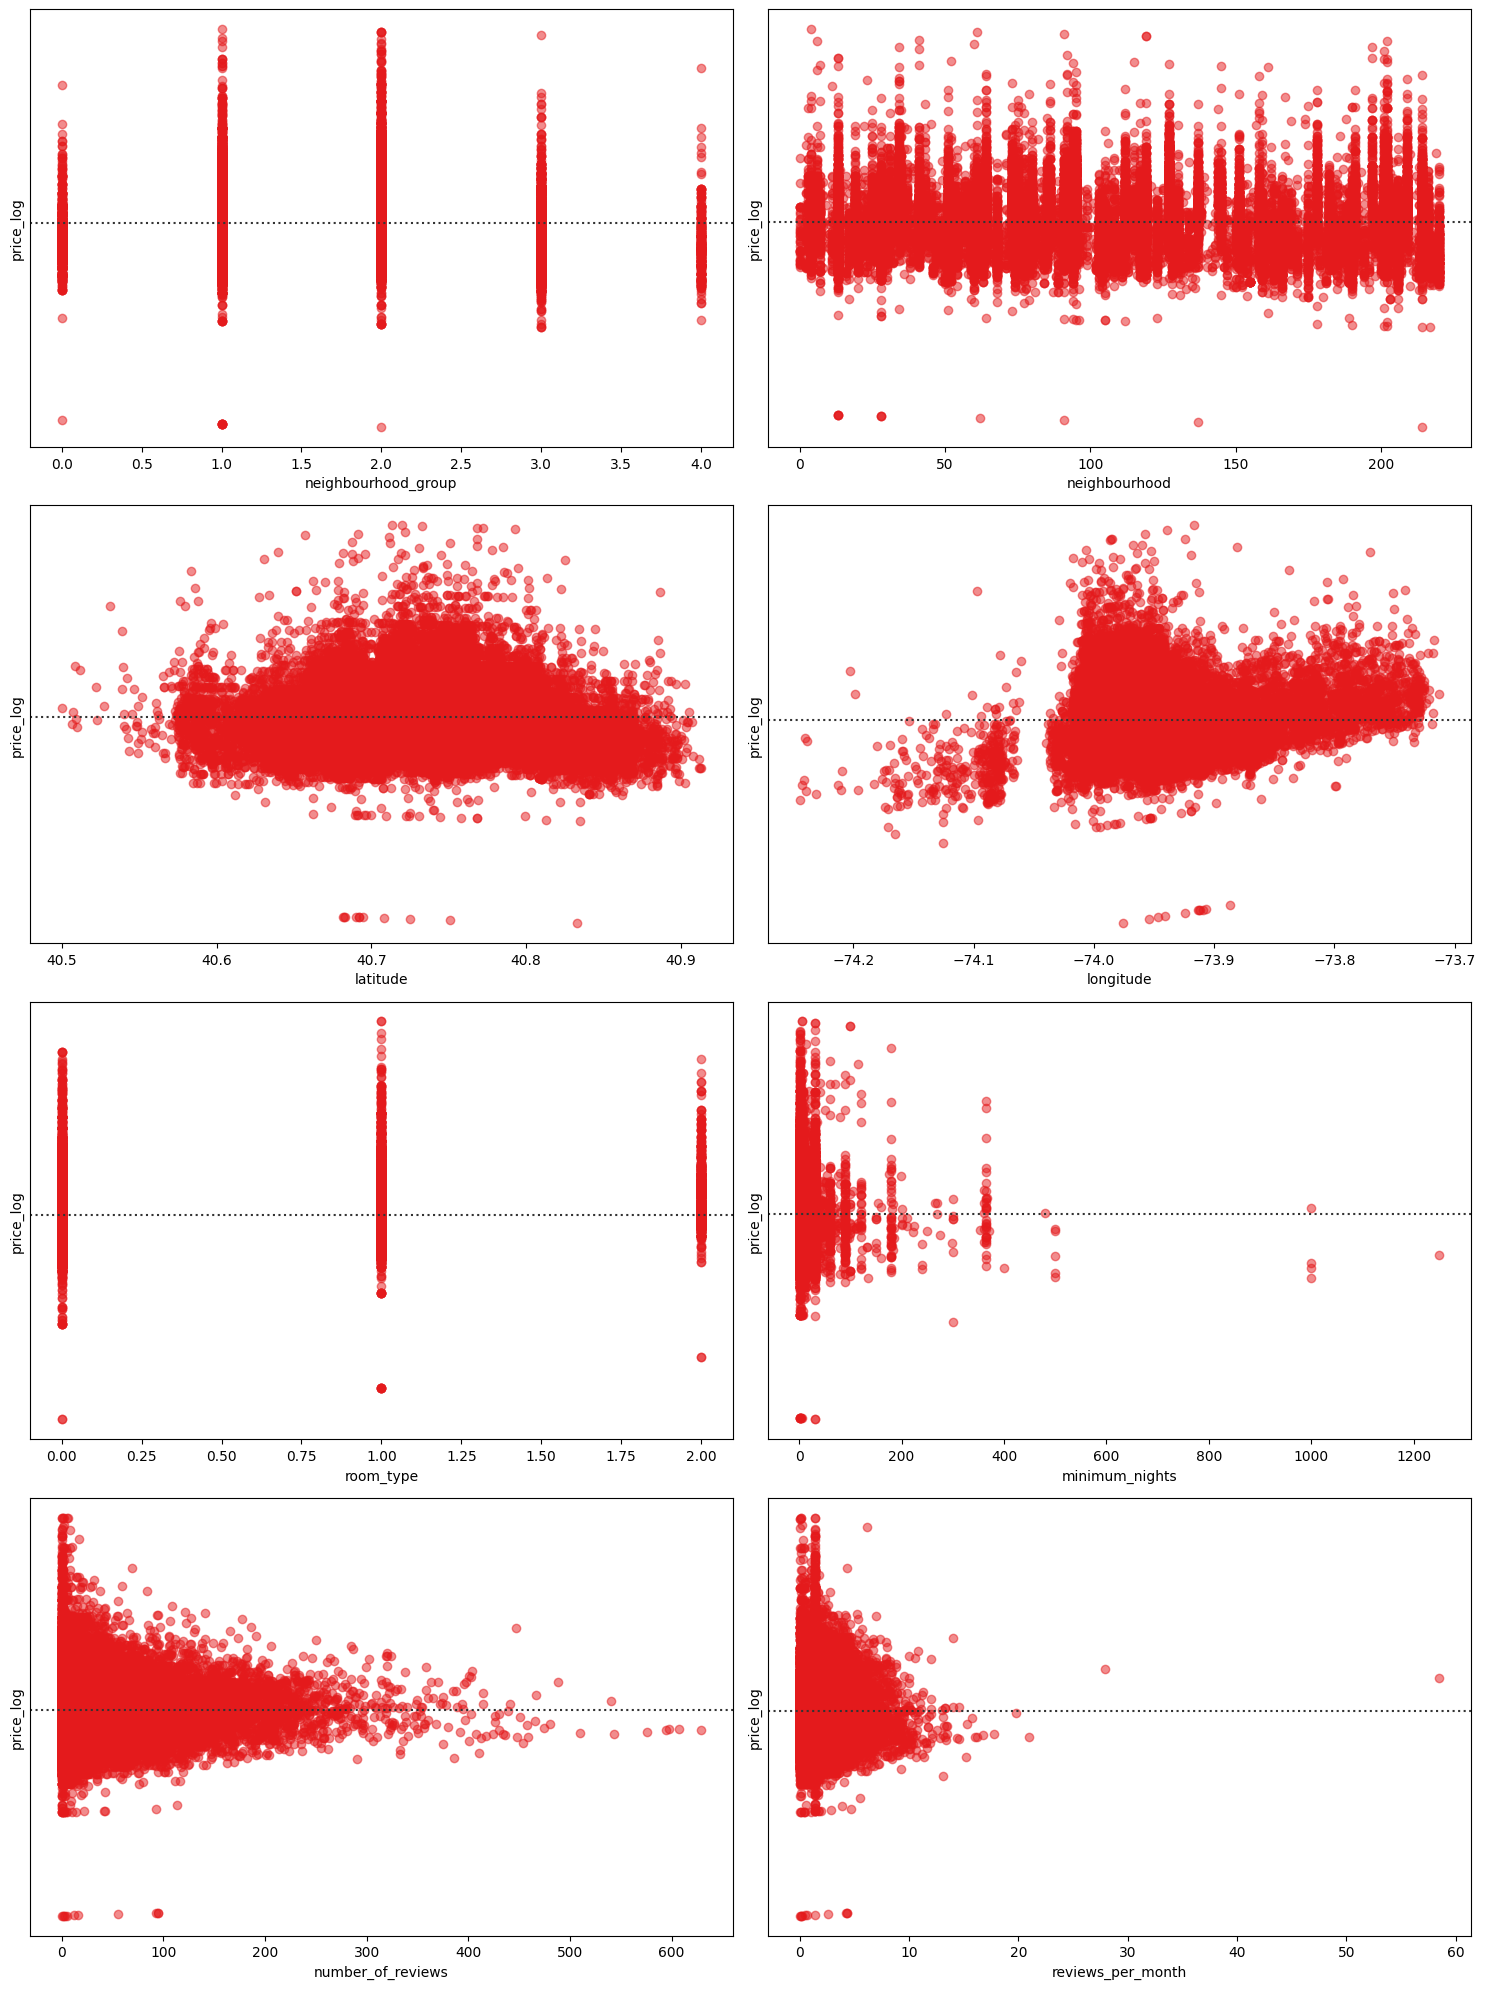

In [27]:
#vykreslenie sady reziduálnych grafov pre každú vlastnosť v modeli voči cieľovej premennej, ktorou je 'price_log'
f, axes = plt.subplots(4, 2, figsize=(15, 20))
sns.residplot(x=nyc_model_x.iloc[:, 0], y=nyc_model_y, lowess=False, scatter_kws={'alpha': 0.5}, line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8}, ax=axes[0, 0])
sns.residplot(x=nyc_model_x.iloc[:, 1], y=nyc_model_y, lowess=False, scatter_kws={'alpha': 0.5}, line_kws={'color': 'green', 'lw': 1, 'alpha': 0.8}, ax=axes[0, 1])
sns.residplot(x=nyc_model_x.iloc[:, 2], y=nyc_model_y, lowess=False, scatter_kws={'alpha': 0.5}, line_kws={'color': 'purple', 'lw': 1, 'alpha': 0.8}, ax=axes[1, 0])
sns.residplot(x=nyc_model_x.iloc[:, 3], y=nyc_model_y, lowess=False, scatter_kws={'alpha': 0.5}, line_kws={'color': 'orange', 'lw': 1, 'alpha': 0.8}, ax=axes[1, 1])
sns.residplot(x=nyc_model_x.iloc[:, 4], y=nyc_model_y, lowess=False, scatter_kws={'alpha': 0.5}, line_kws={'color': 'yellow', 'lw': 1, 'alpha': 0.8}, ax=axes[2, 0])
sns.residplot(x=nyc_model_x.iloc[:, 5], y=nyc_model_y, lowess=False, scatter_kws={'alpha': 0.5}, line_kws={'color': 'black', 'lw': 1, 'alpha': 0.8}, ax=axes[2, 1])
sns.residplot(x=nyc_model_x.iloc[:, 6], y=nyc_model_y, lowess=False, scatter_kws={'alpha': 0.5}, line_kws={'color': 'cyan', 'lw': 1, 'alpha': 0.8}, ax=axes[3, 0])
sns.residplot(x=nyc_model_x.iloc[:, 7], y=nyc_model_y, lowess=False, scatter_kws={'alpha': 0.5}, line_kws={'color': 'magenta', 'lw': 1, 'alpha': 0.8}, ax=axes[3, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()


Samotné grafy boxplotov sú vizuálny spôsob reprezentácie štatistických údajov o rozložení dát. Každý boxplot sa skladá z rôznych častí, ktoré poskytujú informácie o dátach.

neighbourhood_group                  Axes(0.125,0.712609;0.227941x0.167391)
neighbourhood                     Axes(0.398529,0.712609;0.227941x0.167391)
latitude                          Axes(0.672059,0.712609;0.227941x0.167391)
longitude                            Axes(0.125,0.511739;0.227941x0.167391)
room_type                         Axes(0.398529,0.511739;0.227941x0.167391)
minimum_nights                    Axes(0.672059,0.511739;0.227941x0.167391)
number_of_reviews                     Axes(0.125,0.31087;0.227941x0.167391)
reviews_per_month                  Axes(0.398529,0.31087;0.227941x0.167391)
calculated_host_listings_count     Axes(0.672059,0.31087;0.227941x0.167391)
availability_365                         Axes(0.125,0.11;0.227941x0.167391)
price_log                             Axes(0.398529,0.11;0.227941x0.167391)
dtype: object

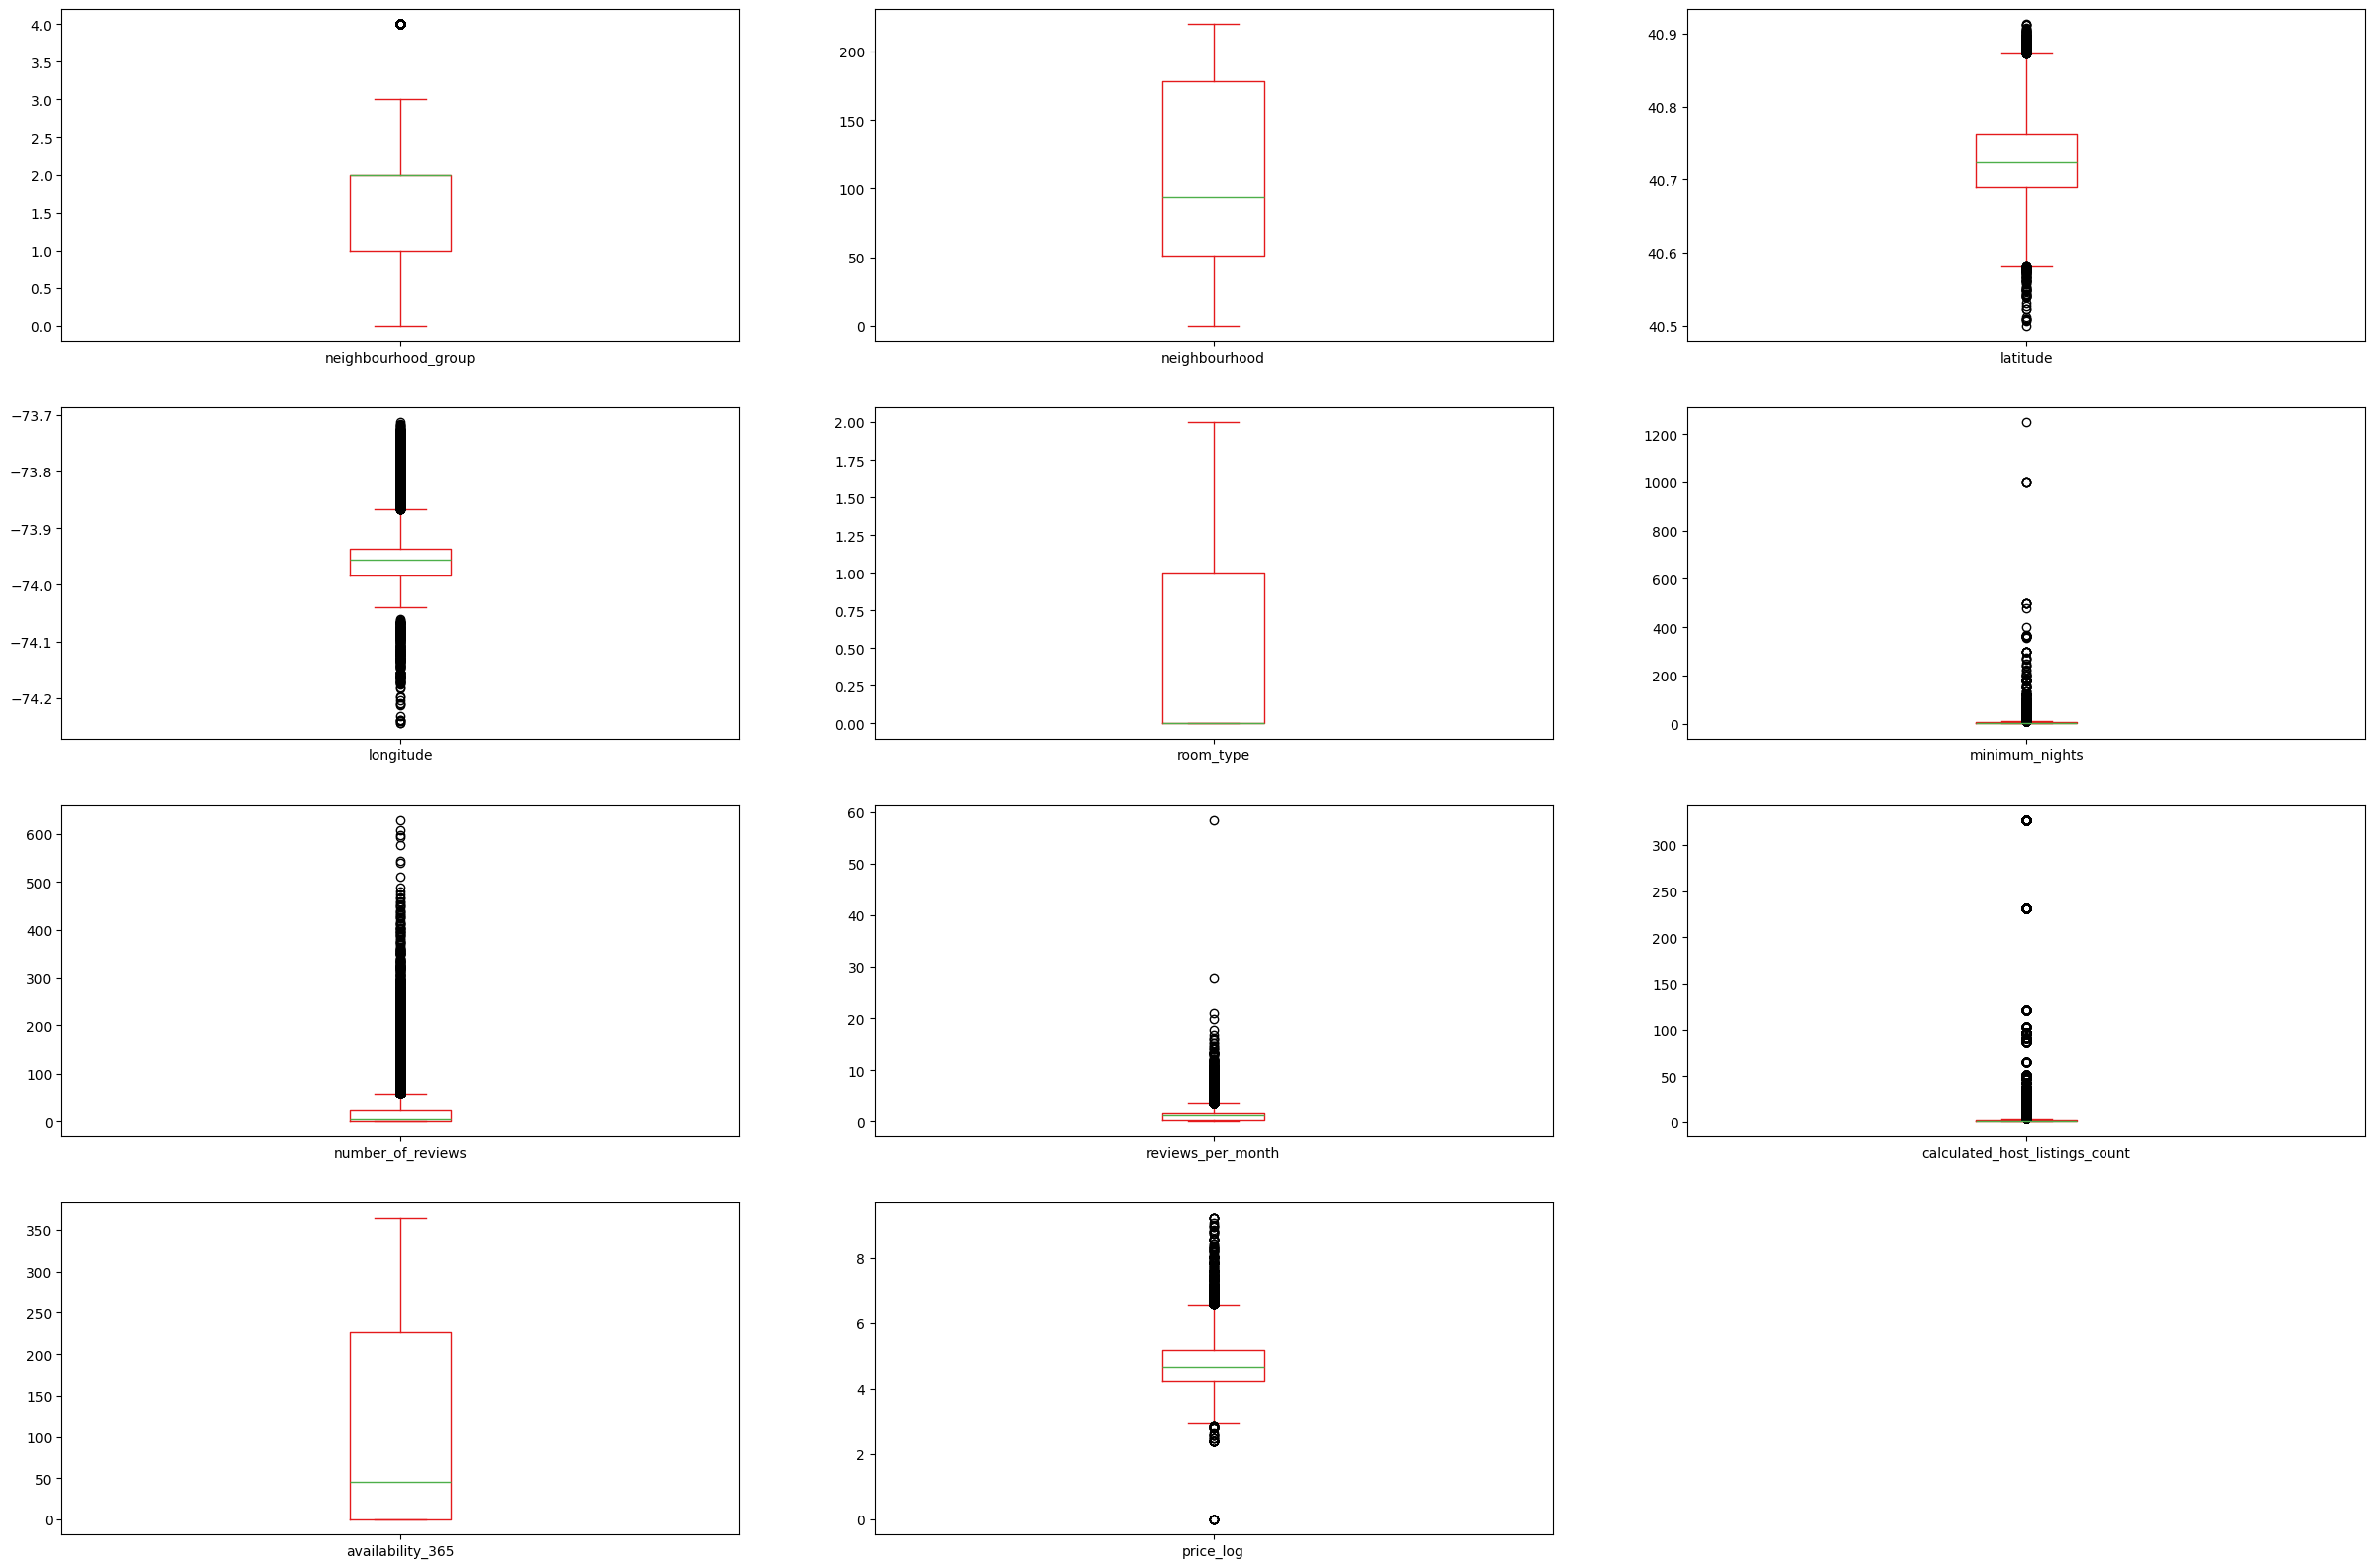

In [28]:

#vykresenie boxplotov pre každý atribút v rámci nyc_model v rozložení 4x3
#grafy majú veľkosť 30x20
nyc_model.plot(kind="box",subplots=True, layout=(4,3),figsize=(30,20))

In [29]:
#zobrazuje pôvodný tvar dátového rámca
print(nyc_data.shape)
#ukazuje tvar dát po aplikácii filtračnej podmienky nyc_data['minimum_nights'] < 365
nyc_data = nyc_data[nyc_data['minimum_nights'] < 365]
print(nyc_data.shape)


(48895, 17)
(48852, 17)


## Úprava dát pre modelovanie 

Najprv bude použitá technika Standard Scaler na normalizáciu datasetu. Každá vlastnosť tak bude mať priemer 0 a štandardnú odchýlku 1. Táto úprava nám zabezpečí, aby mali premenné podobné váhy.


 

In [30]:
scaler = StandardScaler()
nyc_model_x = scaler.fit_transform(nyc_model_x)

Druhým krokom bude rozdelenie dát v pomere 70–30.

Tento kód rozdeľuje dáta na trénovacie a testovacie súbory. Dáta sú rozdelené tak, aby 70 % dát tvorilo trénovaciu sadu (X_train, y_train), zatiaľ čo 30 % tvorí testovaciu sadu (X_test, y_test). Parametre test_size=0.3 a random_state=42 určujú, že 30 % dát bude použitých na testovanie modelu a nastavuje sa aj hodnota pre generátor náhodných čísel pre opakovateľnosť rozdelenia dát.

In [31]:
#rozdelenie dáta na trénovacie a testovacie súbory v pomere 70-30
X_train, X_test, y_train, y_test = train_test_split(nyc_model_x, nyc_model_y, test_size=0.3,random_state=42)

V tejto časti si vyberieme 10 najdôležitejších atribútov a zobrazíme ich dôležitosť v horizontálnom stĺpcovom grafe z trénovacieho datasetu (X_train a y_train). Neskôr nám tento graf pomôže vylepšovať modely, ktoré použijeme pri predikcii

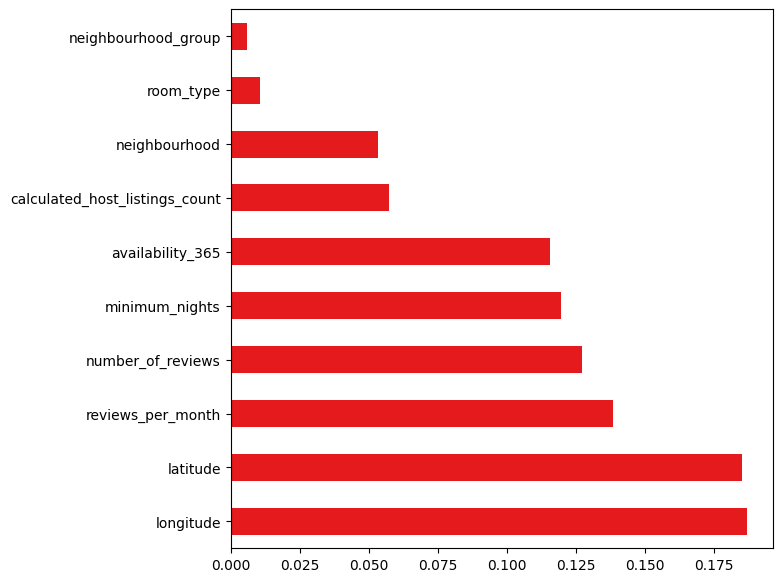

In [32]:
lab_enc = preprocessing.LabelEncoder()  #kódovanie kategorických premenných do numerického formátu

feature_model = ExtraTreesClassifier(n_estimators=50) #spustíme model ExtraTreesClassifier s 50 stromami. ExtraTreesClassifier
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=nyc_model.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Graf vyššie ukazuje dôležitosť aktributov v datasete. Podľa toho majú atribúty neighborhood group a room type najnižšiu dôležitosť pre model. Na základe tohto výsledku sa budeme snažiť zlepšiť výkonnosť použitých predikovacích algoritmov.

# 3. Model Building



## Fáza 1 – so všetkými funkciami¶

Prvá fáza sa zaoberá vytvorením modelov, ktoré sa snažia predvídať ceny podľa rôznych faktorov. K hodnoteniu modelov slúžia metriky ako R2 skóre, ktoré môžete použiť na vyhodnotenie výkonnosti modelu na testovacích dátach. R2 skóre ukazuje, ako dobre model vysvetľuje variabilitu cieľovej premennej voči vstupným premenným (ako dobre sa model prispôsobí dátam). RMSE ukazuje chybovosť modelu. Potom sa vytvorí tabuľka zobrazujúca porovnanie medzi skutočnými a predpovedanými hodnotami pre prvých 5 záznamov. Nakoniec sa zobrazí vizualizácia týchto rozdielov pomocou grafu slúpcov (pre prvých 50 záznamov).

R2 score:  46.1117035551264
RMSE:  0.5046688958014123
   Actual Values  Predicted Values
0       4.499810          5.094992
1       3.433987          4.273489
2       4.795791          4.474662
3       6.154858          5.506420
4       5.298317          5.017161


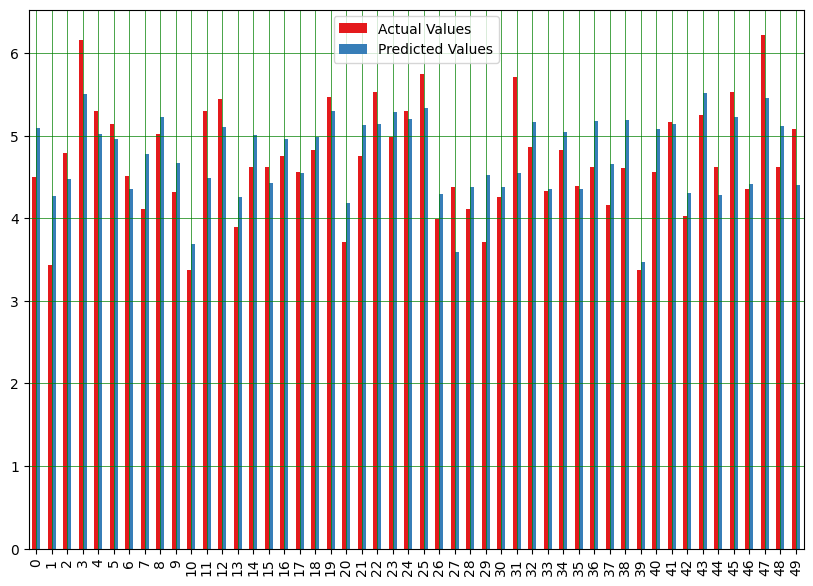

In [33]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred_lr=reg.predict(X_test)

# Výpočet R2 skóre a RMSE
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score: ",r2_score(y_test,y_pred_lr)*100) #chceme vidieť percentá
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_lr)))

# Porovnanie skutočných a predikovaných hodnôt
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred_lr.flatten()})
print(error_diff.head(5))

# Vizualizácia chýb na grafe (hodnoty z testovacej množiny sú červené a predikované sú modré)
df1 = error_diff.head(50)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

Random Forest Regressor R2 score: 0.6031016607586781
Random Forest Regressor RMSE: 0.4331107390667964
Random Forest Regressor MSE: 0.1875849122949866


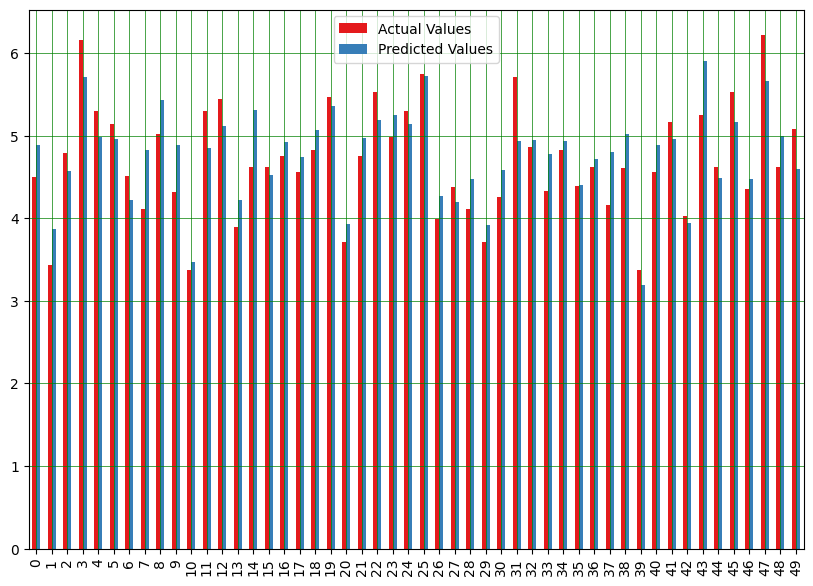

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest Regressor R2 score: {rf_r2}")
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f"Random Forest Regressor RMSE: {rf_rmse}")
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Regressor MSE: {rf_mse}")

error_diff_rf = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': rf_predictions.flatten()})

df_rf = error_diff_rf.head(50)
df_rf.plot(kind='bar', figsize=(10, 7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

R2 score:  20.16542384458342
RMSE:  0.6142636604453832
   Actual Values  Predicted Values
0       4.499810          5.017280
1       3.433987          4.110874
2       4.795791          4.262680
3       6.154858          5.463832
4       5.298317          5.303305


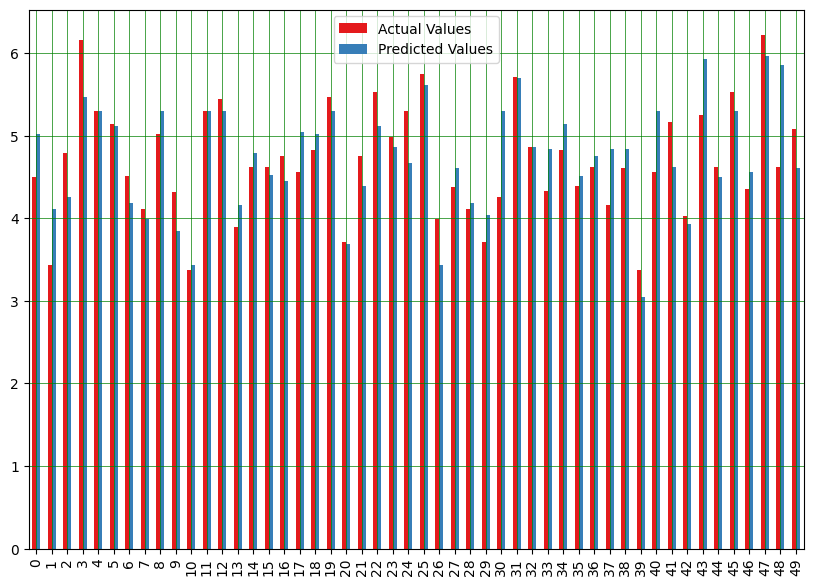

In [35]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
print("R2 score: ", r2_score(y_test, y_pred_tree) * 100)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_tree)))

error_diff_tree = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred_tree.flatten()})
print(error_diff_tree.head(5))

df_tree = error_diff_tree.head(50)
df_tree.plot(kind='bar', figsize=(10, 7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

R2 score:  53.3482593995863
RMSE:  0.469562317630575
   Actual Values  Predicted Values
0       4.499810          4.750748
1       3.433987          3.563461
2       4.795791          4.498928
3       6.154858          5.726241
4       5.298317          4.944997


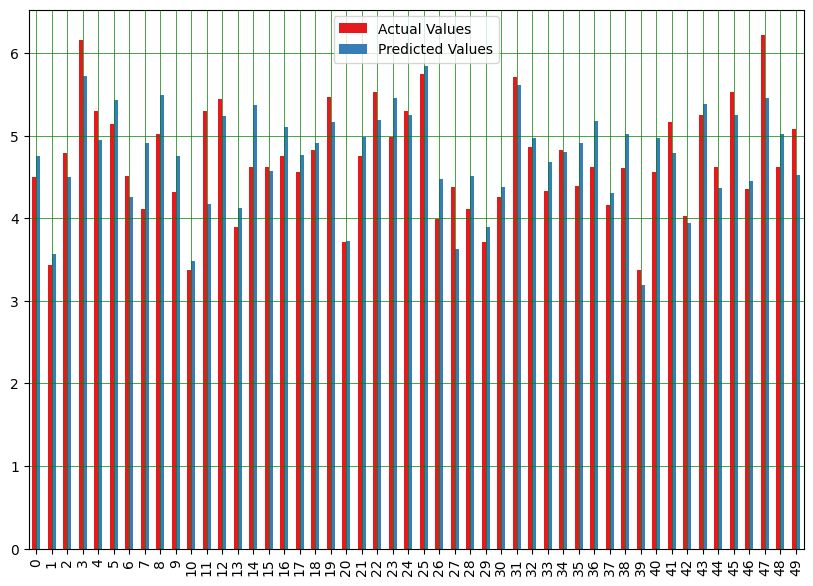

In [36]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()

knn_reg.fit(X_train, y_train)

y_pred_knn = knn_reg.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
print("R2 score: ", r2_score(y_test, y_pred_knn) * 100)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_knn)))

error_diff_knn = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred_knn.flatten()})
print(error_diff_knn.head(5))

df_knn = error_diff_knn.head(50)
df_knn.plot(kind='bar', figsize=(10, 7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

R2 score:  61.28446546324735
RMSE:  0.4277617436436282
   Actual Values  Predicted Values
0       4.499810          4.733190
1       3.433987          3.719393
2       4.795791          4.727449
3       6.154858          5.683338
4       5.298317          4.953413


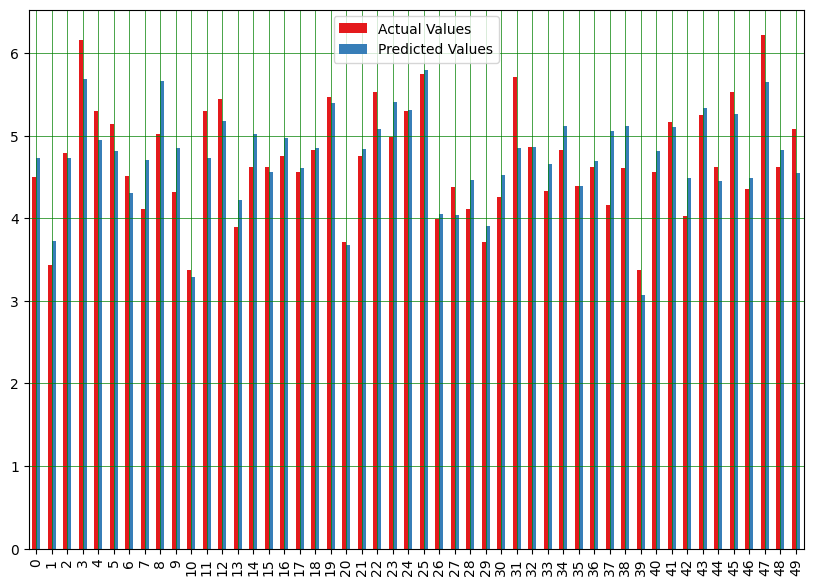

In [37]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()

xgb_reg.fit(X_train, y_train)

y_pred_xgb = xgb_reg.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
print("R2 score: ", r2_score(y_test, y_pred_xgb) * 100)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

error_diff_xgb = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred_xgb.flatten()})
print(error_diff_xgb.head(5))

df_xgb = error_diff_xgb.head(50)
df_xgb.plot(kind='bar', figsize=(10, 7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()


## Fáza 2


XGBoost mal v prvej fáze najlepšie výsledky R2 a RMSE, to znamená, že je najvhodnejším pre predikovanie ceny. Kedže má najlepší výkon, rozhodli sme sa s ním pracovať ďalej. Pred samotným spustením odstránime neighbourhood_group a room_type, ktoré boli podľa už spomenutúho grafu najmenej dôležité. 

Výsledky budeme ukladať do nového datasetu s novými premennými, aby nedošlo k narušeniu pôvodných dát.

In [38]:
nyc_model_xx, nyc_model_yy = nyc_model.iloc[:,:-1], nyc_model.iloc[:,-1]

In [39]:
nyc_model_xx= nyc_model.drop(columns=['neighbourhood_group', 'room_type' ]) #vymazanie atributov
scaler = StandardScaler()
nyc_model_xx = scaler.fit_transform(nyc_model_xx)
XX_train, XX_test, yy_train, yy_test = train_test_split(nyc_model_xx, nyc_model_yy, test_size=0.3,random_state=42)

In [ ]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(XX_train, yy_train)
yy_pred_xgb = xgb_reg.predict(XX_test)

from sklearn.metrics import r2_score, mean_squared_error
print("R2 score: ", r2_score(yy_test, yy_pred_xgb) * 100)
print("RMSE: ", np.sqrt(mean_squared_error(yy_test, yy_pred_xgb)))

error_diff_xgb = pd.DataFrame({'Actual Values': np.array(yy_test).flatten(), 'Predicted Values': yy_pred_xgb.flatten()})
print(error_diff_xgb.head(5))

df_xgb = error_diff_xgb.head(50)
df_xgb.plot(kind='bar', figsize=(15, 7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

V druhej fáze pri použiti modelu XGB vidíme lepšie R2 aj RMSE, čo znamená že náš model predikuje cenu takmer dokonalo. Overiť si to môžme taktiež porovnaním testovacích a predikovaných dát.

# 4. Porovnanie modelov

Na záver si pomocou uložených premenných porovnáme 3 metriky na hodnotenie predikcií.

In [ ]:


print('------------FAZA-1-----------')
print('---LR---')
print('MAE: %f'% mean_absolute_error(y_test, y_pred_lr))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_pred_lr)))   
print('R2 %f' % r2_score(y_test, y_pred_lr))


print('---Random forest---')
print('MAE: %f'% mean_absolute_error(y_test, rf_predictions))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, rf_predictions)))   
print('R2 %f' % r2_score(y_test, rf_predictions))

print('---Decision tree---')
print('MAE: %f'% mean_absolute_error(y_test, y_pred_tree))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_pred_tree)))   
print('R2 %f' % r2_score(y_test, y_pred_tree))

print('---KNN---')
print('MAE: %f'% mean_absolute_error(y_test, y_pred_knn))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_pred_knn)))   
print('R2 %f' % r2_score(y_test, y_pred_knn))

print('---XGB---')
print('MAE: %f' % mean_absolute_error(y_test, y_pred_xgb))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print('R2 %f' % r2_score(y_test, y_pred_xgb))

print('-------------FAZA-2-------------')
print('---XGB---')
print('MAE: %f' % mean_absolute_error(yy_test, yy_pred_xgb))
print('RMSE: %f' % np.sqrt(mean_squared_error(yy_test, yy_pred_xgb)))
print('R2 %f' % r2_score(yy_test, yy_pred_xgb))



V prvej fáze vidíme, že Random Forest a XGBoost dosahujú lepšie výsledky (nižšie hodnoty chýb a vyšší koeficient determinácie) v porovnaní s lineárnou regresiou alebo rozhodovacím stromom. V druhej fáze, špecificky s modelob XGBoost a po úprave nášho datasetu, vidíme výrazné zlepšenie v prediktívnej presnosti so všetkými metrikami na veľmi vysokej úrovni. 

Porovnanie modelov si môžme ukázať aj na scatter grafoch.
Na osi X (horizontálne) sú skutočné hodnoty, ktoré sme získali v testovacom súbore.
Na osi Y (vertikálne) sú predpovedané hodnoty, ktoré vypočítali jednotlivé modely pre tú istú sadu testovacích údajov. Ak sú body na diagonále, znamená to, že predpovedané hodnoty modelu sú rovnaké ako skutočné hodnoty. Naopak, ak sú body rozptýlené existuje priestor na zlepšenie modelu. 

Toto všetko je možné vidieť na poslednom grafe, pri ktorom sme vylepšili naše dáta, tak aby bola predikcia ceny čo najpresnejšia



In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(30, 20))
fig.suptitle('True Values vs Predictions')

ax1.scatter(y_test, y_pred_lr)
ax1.set_title('LR')

ax2.scatter(y_test, rf_predictions)
ax2.set_title('Random Forest ')

ax3.scatter(y_test, y_pred_tree)
ax3.set_title('Decision Tree')

ax4.scatter(y_test, y_pred_knn)
ax4.set_title('K Nearest Neighbors ')

ax5.scatter(yy_test, y_pred_xgb)
ax5.set_title('XGBoost ')

ax6.scatter(yy_test, yy_pred_xgb)
ax6.set_title('XGBoost Druha fáza ')


for ax in fig.get_axes():
    ax.set(xlabel='True Values', ylabel='Predictions')
